In [11]:
!pip install opencv-python

In [30]:
#!pip install torch torchvision

In [34]:
#!pip install tensorflow

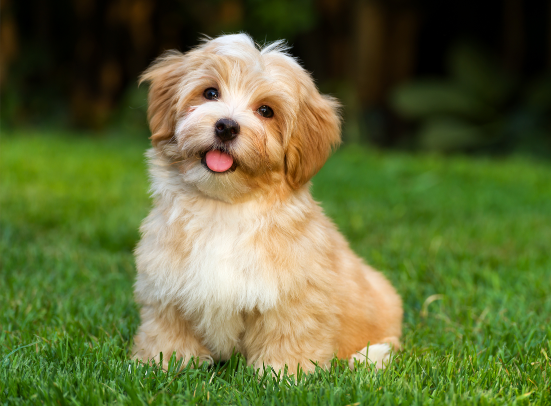

In [39]:
import cv2
from google.colab.patches import cv2_imshow

FileName = 'dog.jpg'
img = cv2.imread(FileName)

# Проверка, удалось ли загрузить изображение
if img is None:
    print("Ошибка: изображение не найдено.")
else:
  imgResize = cv2.resize(img, dsize=(img.shape[1] // 2, img.shape[0] // 2))
  cv2_imshow(imgResize)

# Загрузка GoogleNet в TensorFlow

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

# Загрузка предобученной модели InceptionV3 (GoogleNet)
model = InceptionV3(weights='imagenet')

# Пример использования модели для классификации изображения
img_path = 'dog.jpg'  # Замените на путь к вашему изображению
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Предсказание класса изображения
preds = model.predict(x)
print('Predicted:', tf.keras.applications.inception_v3.decode_predictions(preds, top=3)[0])


1/1 [==============================] - 2s 2s/step
Predicted: [('n02098413', 'Lhasa', 0.74933106), ('n02086240', 'Shih-Tzu', 0.06040412), ('n02097474', 'Tibetan_terrier', 0.0462524)]


# Загрузка GoogleNet в PyTorch

In [31]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import json
import requests

# Загрузка предобученной модели InceptionV3 (GoogleNet)
model = models.inception_v3(pretrained=True)
model.eval()

# Загрузка метаданных классов ImageNet
url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
response = requests.get(url)
labels = json.loads(response.text)

# Пример использования модели для классификации изображения
img_path = 'dog.jpg'  # Замените на путь к вашему изображению
img = Image.open(img_path)

# Преобразование изображения
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0)  # создание пакета из одного изображения

# Предсказание класса изображения
with torch.no_grad():
    output = model(input_batch)

# Декодирование предсказаний
_, indices = output.topk(3)
predicted_labels = [labels[idx] for idx in indices[0]]
print('Predicted:', predicted_labels)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Predicted: ['Lhasa Apso', 'Tibetan Terrier', 'Shih Tzu']
